In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data-jarak-jakarta-dengan-beberapa-kota-di-pulau-jawa-dan-bali-tahun-2012.csv')

In [8]:
#mementukan nilai terkecil
colum = df['jarak']
min_value = colum.min()
print( "nilai terkecil",min_value)

nilai terkecil 1295


In [9]:
#menentukan nilai terbesar
colum = df['jarak']
min_value = colum.max()
print( "nilai terbesar",min_value)

nilai terbesar 1295


In [17]:

# Menemukan kota dengan jarak terpendek
min_distance = df['jarak'].min()
min_distance_city = df.loc[df['jarak'] == min_distance, 'nama_kota'].iloc[0]

# Menampilkan hasil
print(f"Kota dengan jarak terpendek: {min_distance_city} (jarak: {min_distance})")


Kota dengan jarak terpendek: Bogor (jarak: 60)


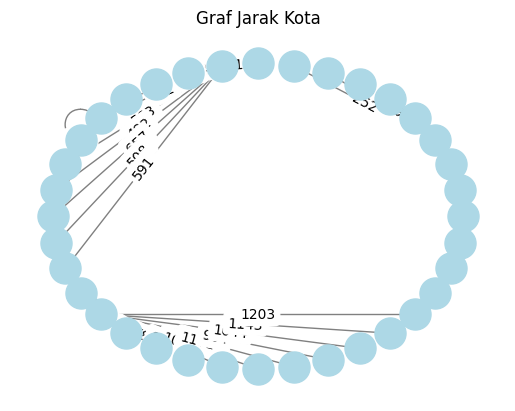

In [24]:
# Membangun graph
G = nx.from_pandas_edgelist(df, 'nama_kota', 'nama_provinsi', ['jarak'])

# Mengatur posisi node dengan menggunakan circular layout
pos = nx.circular_layout(G)

# Menggambar node dan edge
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Menambahkan label pada node
node_labels = nx.get_node_attributes(G, 'nama_kota')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Menambahkan label pada edge (jarak)
edge_labels = nx.get_edge_attributes(G, 'jarak')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Menampilkan plot
plt.title('Graf Jarak Kota')
plt.axis('off')
plt.show()

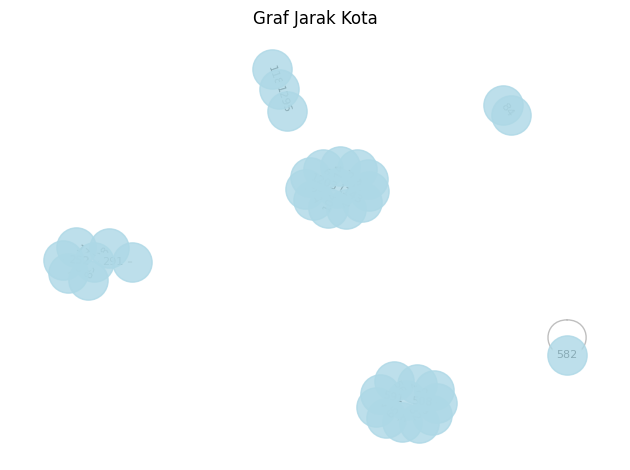

In [21]:
# Membangun graph
G = nx.from_pandas_edgelist(df, 'nama_kota', 'nama_provinsi', ['jarak'])

# Mengatur posisi node dengan menggunakan spring layout
pos = nx.spring_layout(G, seed=42)

# Menggambar node dan edge dengan penyesuaian visual
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.0, alpha=0.5)

# Menambahkan label pada node dengan penyesuaian visual
node_labels = nx.get_node_attributes(G, 'nama_kota')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Menambahkan label pada edge (jarak) dengan penyesuaian visual
edge_labels = nx.get_edge_attributes(G, 'jarak')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Menampilkan plot
plt.title('Graf Jarak Kota')
plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

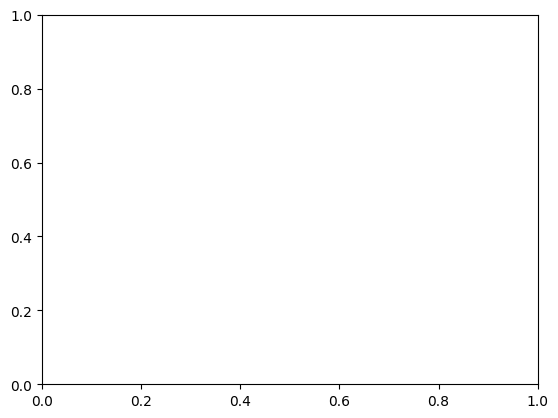

In [22]:
# Membangun graph
G = nx.from_pandas_edgelist(df, 'nama_kota', 'nama_provinsi', ['jarak'])

# Mengatur posisi node dengan menggunakan circular layout
pos = nx.circular_layout(G)

# Menggambar node dengan ukuran yang berbanding terbalik dengan jaraknya
node_size = [1 / jarak for jarak in df['jarak']]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_size, alpha=0.8)

# Menggambar edge dengan ketebalan yang berbanding lurus dengan jaraknya
edge_width = [jarak / 50 for jarak in df['jarak']]
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_width, alpha=0.5)

# Menambahkan label pada node
node_labels = nx.get_node_attributes(G, 'nama_kota')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Menampilkan plot
plt.title('Graf Jarak Kota')
plt.axis('off')
plt.tight_layout()
plt.show()